In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The dataset here we are going to explore is formed from the Hass Avocado Board(HAB) website.HAB is the only avocado organization that equips the entire global industry for success by collecting, focusing and distributing investments to maintain and expand demand for avocados in the United States.
 Our task is to perform a complete EDA for the given dataset and visualize the data in two angles:- to find the city or region; find the average price

In [2]:
#importing dataframe from the csv file
ds=pd.read_csv('avocado.csv',parse_dates=['Date'])
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

## Decription of each columns
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Total Bags - Total number of bags sold

Small Bags - Total number of small bags sold

Large Bags - Total number of large bags sold

XLarge Bags - Total number of XLarge bags sold

In [4]:
#lets find the datatypes of each columns
ds.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [5]:
#let us find whether there are null values in our dataset
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

there are no null values present in any of the columns.we can aslo graphical visualize this by taking the heatmap

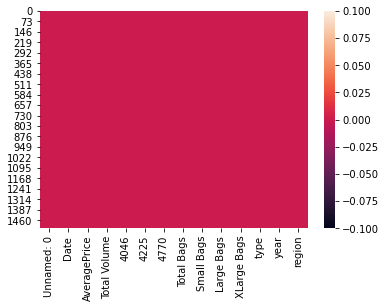

In [6]:
#finding null values using heatmap
sns.heatmap(ds.isnull())

In [7]:
#we have an additional column regarding the serial number which we can drop it.
ds.drop(columns='Unnamed: 0',axis=1,inplace=True)
ds

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


let us find the total volume of avocados sold with respective other attributes

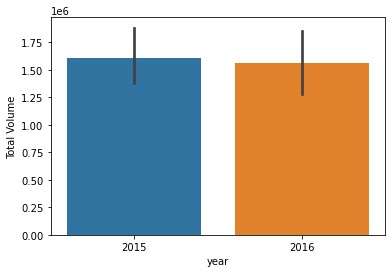

In [8]:
sns.barplot(x='year',y='Total Volume',data=ds)

More volume of avocados are sold in the year 2015 than 2016

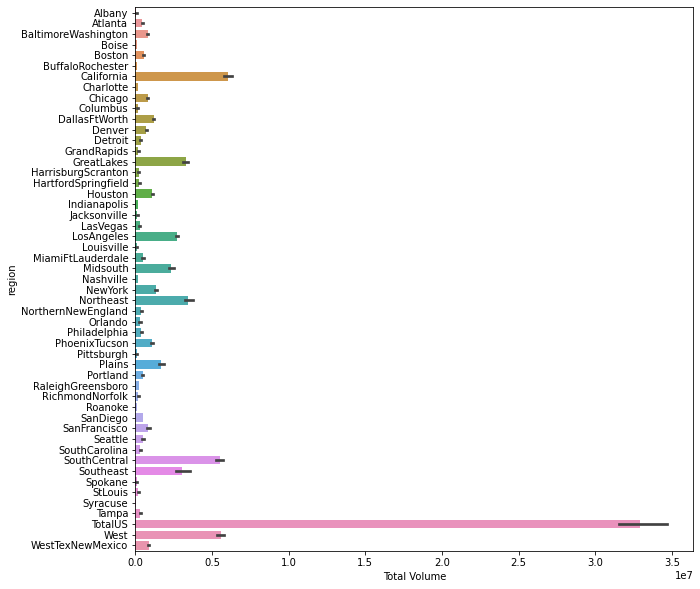

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(y='region',x='Total Volume',data=ds)
plt.show()

More volume of avocados are sold in California as compared to other states in US and the Total volume of avocados sold across the entire US is around 3.3

In [10]:
#lets find the types of avocados sold.
ds['type'].unique()
#The two different categories specified in our problem statement are conventional and organic, where in this dataset we have all the datas of conventional type so there is no relevance of the attribute 'type'.  

array(['conventional'], dtype=object)

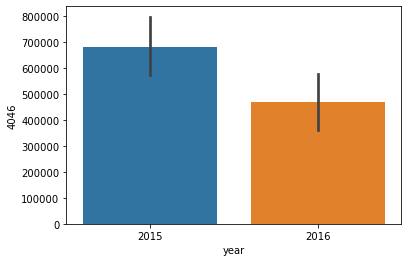

In [11]:
sns.barplot(x='year',y='4046',data=ds)

In the year 2015 total number of PLU 4046 avocados sold are around 680000 whereas in the next year the sale was less around 490000.

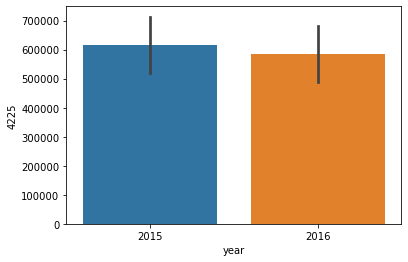

In [12]:
sns.barplot(x='year',y='4225',data=ds)

In the year 2015 total number of PLU 4225 avocados sold are around 610000 whereas in the next year the sale was less around 590000.

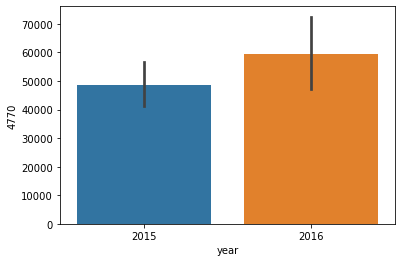

In [13]:
sns.barplot(x='year',y='4770',data=ds)

In the year 2015 total number of PLU 4770 avocados sold are around 490000 whereas in the next year the sale was more around 600000.

Here we can make an inference that in the year 2015 the sales of PLU 4770,PLU 4225 and PLU 4046 are in an ascending order and in the next year their sales are in a descending order. Only the PLU 4770 has seen an increase in sales in the next year as compared to the others

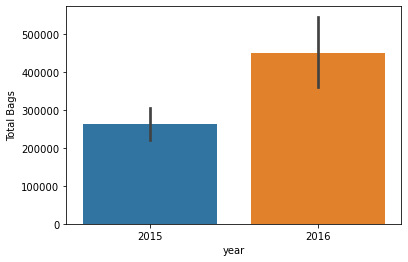

In [14]:
#total bags sold in respective years
sns.barplot(x='year',y='Total Bags',data=ds)

In 2015,nearly 270000 total bags were sold and in the next year sale was high around 450000.

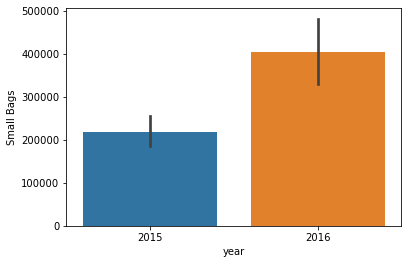

In [15]:
#number of small bags sold
sns.barplot(x='year',y='Small Bags',data=ds)

In the year 2015, the number of small bags sold were around 220000 and in the coming year the sales was high around 410000.

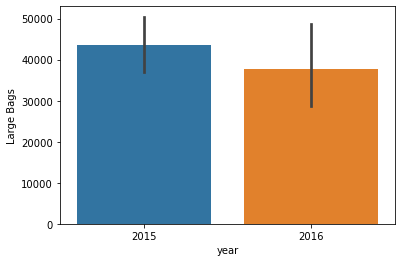

In [16]:
#number of large bags sold
sns.barplot(x='year',y='Large Bags',data=ds)

The sales of large bags were around 430000 in the year 2015 and was reduced to nearly 380000 in the next year  

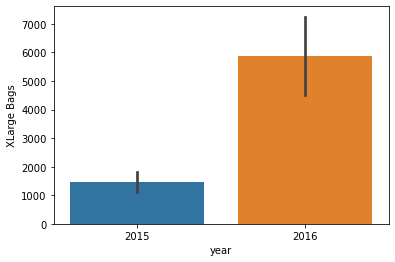

In [17]:
#number of XL bags sold
sns.barplot(x='year',y='XLarge Bags',data=ds)

In the year 2015, the sales of XL bags were around 1500 and it increased drastically to an approximate of 5900 in the coming year. 

Only the Large bags saw a reduce in sales in the next year whereas the others have been improved.

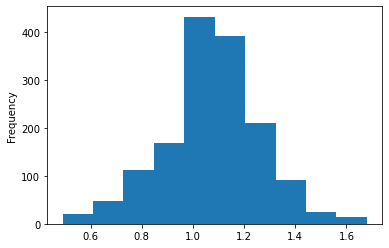

In [18]:
ds['AveragePrice'].plot.hist(bins=10)
plt.show()

The most frequent average price of a single avocado is between 1.0 - 1.1

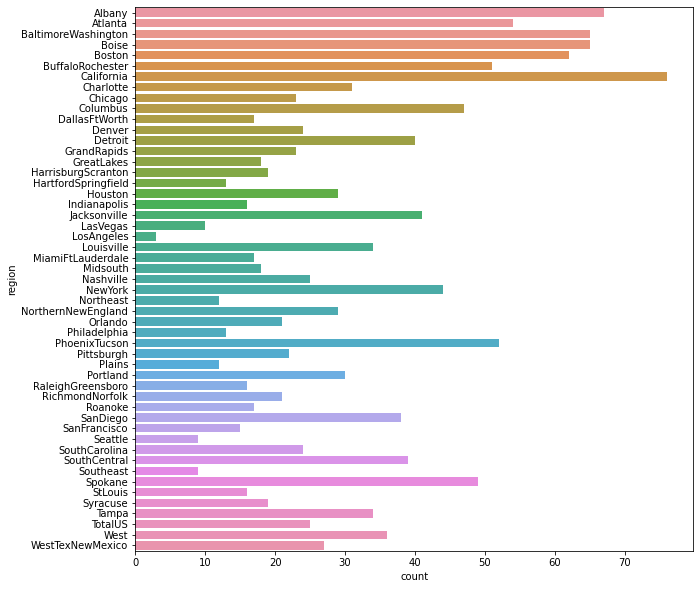

In [19]:
#most frequently occuring region
plt.figure(figsize=(10,10))
sns.countplot(y='region',data=ds)
plt.show()

This dataset contains more than 70+ datas corresponding to California region which is the highest among all other regions 

In [20]:
#creating a new dataframe to visualize the total volume sales in each month
ds_month=pd.DataFrame()
ds_month['month']=ds['Date'].dt.month_name()
ds_month_visualize=pd.concat([ds_month,ds],axis=1,ignore_index=False)
ds_month_visualize

,month,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,December,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,December,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,December,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,June,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,November,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,October,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,September,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,February,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,September,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


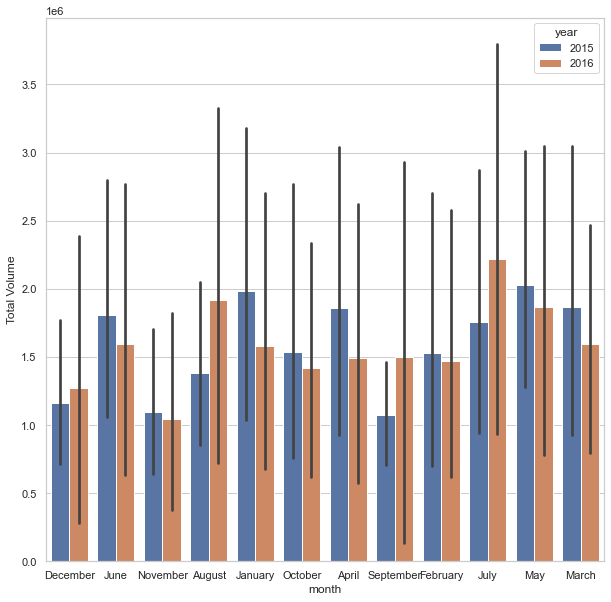

In [21]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.barplot(x='month',y='Total Volume',hue='year',data=ds_month_visualize)
plt.show()

In the year 2015, maximum sales was in the month of May and minimum sales was in the month of September.

In the year 2016, maximum sales was in the month of July and minimum sales was in the month of November.

In [22]:
ds

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [23]:
#since type is common for all data points.we can drop it
#Also date is not much an useful attribute in studying the summary statistics and correlation with other attributes,we can drop it.
ds.drop(columns='type',axis=1,inplace=True)
ds.drop(columns='Date',axis=1,inplace=True)
ds

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [24]:
#Now let us encode the categorical data 
from sklearn.preprocessing import LabelEncoder
list=['year','region']
le=LabelEncoder()
for i in list:
    ds[i]=le.fit_transform(ds[i])


In [25]:
#checking the dataset
ds

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,7


In [26]:
#summary statistics
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,1.000000,50.000000


Mean is greater than median for all columns except average price.

There is a high standard deviation for total volume,total bags,small bags

Except for year,region and average price there is a large difference between the 75th percentile max value,hence outliers are present in the data  

In [27]:
#lets check for correlation
ds.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


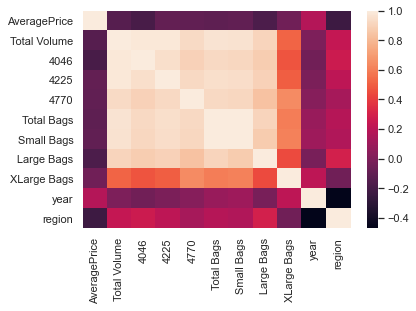

In [28]:
#graphical visualiztion of correlation
sns.heatmap(ds.corr())

The lighter shades in the graph shows positive correlation with the corresponding other attributes.

Our major concerns is to find the region and the average price which are highly negatively correlated to each other.
 

## Treating outliers and skewness

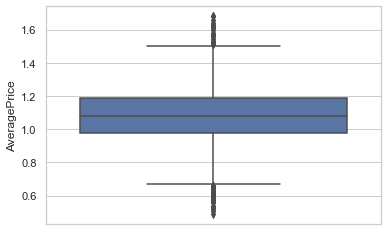

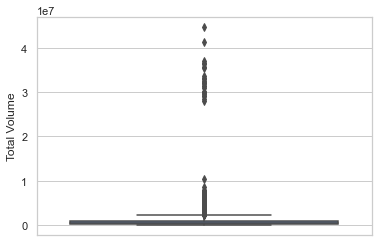

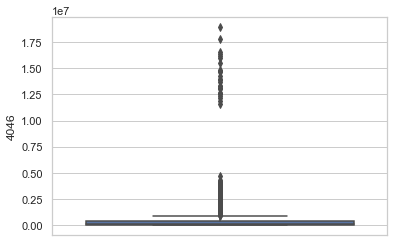

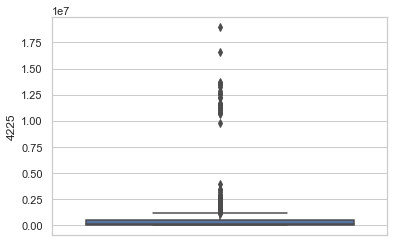

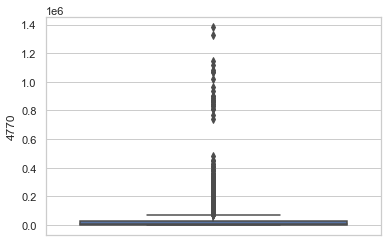

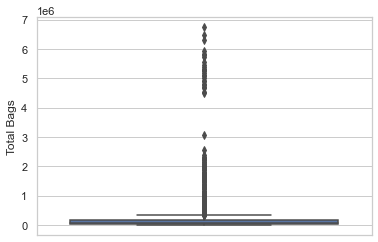

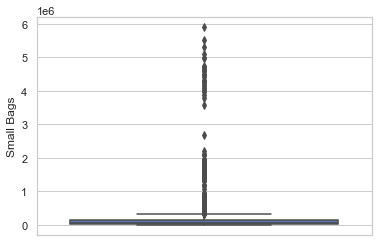

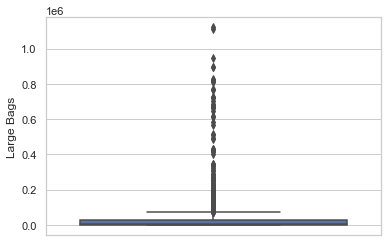

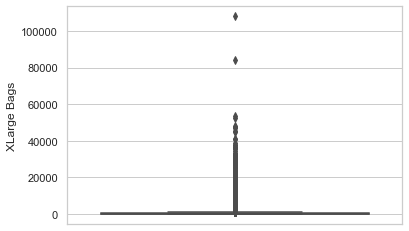

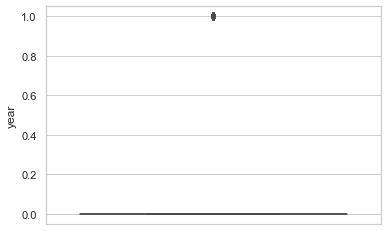

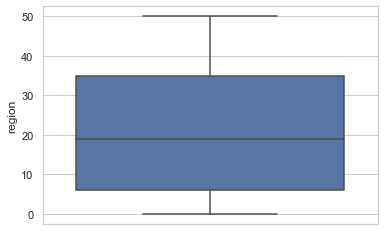

In [29]:
#plotting the boxplot for all attributes to check the outliers
for i in ds.columns:
    plt.figure()
    sns.boxplot(ds[i],orient="v")

In [30]:
#removing the outliers
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)

ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(1517, 11)
(1436, 11)


In [31]:
ds=ds_final

In [32]:
#checking for skewness
ds.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

The datas are highly skewed except for average price and region.we can visualize them graphically by distplot.

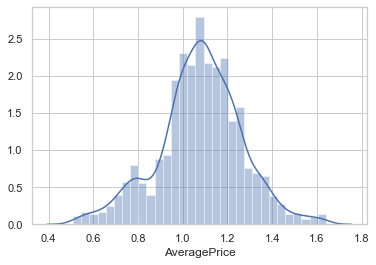

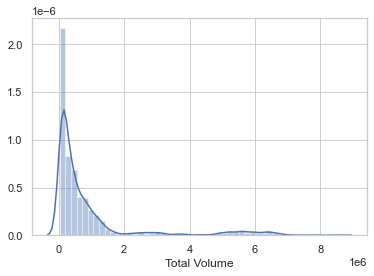

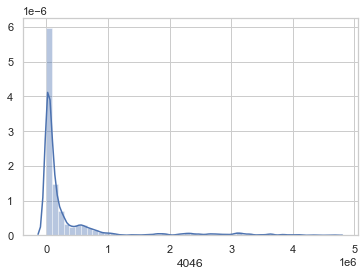

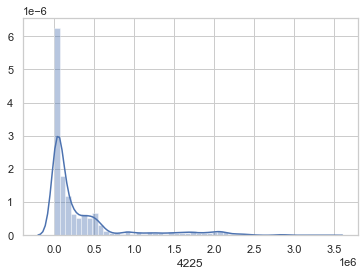

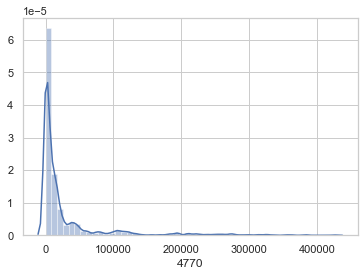

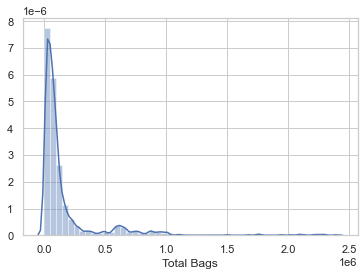

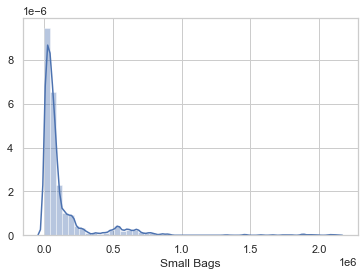

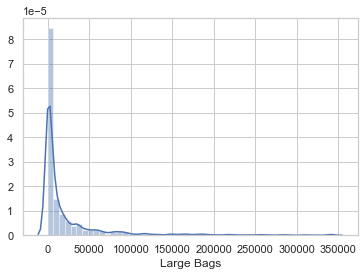

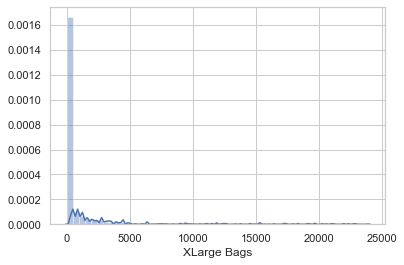

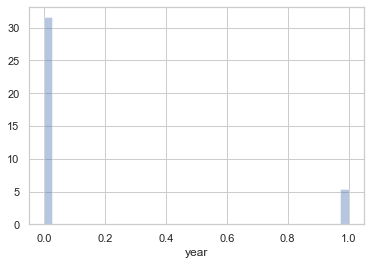

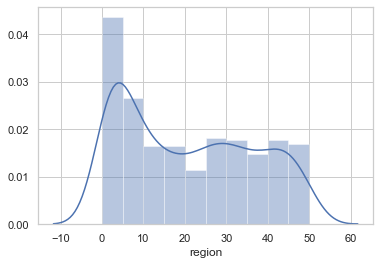

In [33]:
#graphical visualiztion of skewness 
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])

In [34]:
#treating skewness using log
for col in ds.columns:
    if ds.skew().loc[col]>0.55:
        ds[col]=np.log1p(ds[col])

In [35]:
ds.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
dtype: float64

we have reduced the skewness to an extent.

# 1. Finding the average price

For finding the average price we need to create a regression model.For this we consider average price as the output variable and rest other attributes as input data. 

In [36]:
#lets take a seperate dataframe
ds_reg=ds
ds_reg.shape

(1436, 11)

In [37]:
ds_reg

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0.693147,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0.693147,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0.693147,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0.693147,7


In [38]:
#seperating dependent variable from the dataframe
y=ds_reg.iloc[:,0]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [39]:
#seperating independent variables from the dataframe
ds_reg_x=ds_reg.iloc[:,1:]
ds_reg_x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0.0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0.0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0.0,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0.0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0.0,0


In [40]:
#Now we need to standardize the input data.we use standard scaler for the purpose.
from sklearn.preprocessing import StandardScaler
sc_reg=StandardScaler()
x=sc_reg.fit_transform(ds_reg_x)
x=pd.DataFrame(x,columns=ds_reg_x.columns)

In [41]:
x          #standardized input datas.

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870,-1.322817
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870,-1.322817
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870,-1.322817
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870,-1.322817
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870,-1.322817
...,...,...,...,...,...,...,...,...,...,...
1431,-0.548521,-0.020619,-0.485823,0.586167,-0.189379,-0.193283,0.494754,0.946229,2.416215,-0.879305
1432,-0.602663,-0.149612,-0.535121,0.627966,-0.135593,-0.097945,0.438844,-0.775528,2.416215,-0.879305
1433,-0.601885,-0.118772,-0.526545,0.567203,-0.147557,-0.119231,0.426777,1.332463,2.416215,-0.879305
1434,-0.555668,-0.048487,-0.518124,0.585318,-0.127164,-0.083522,0.427507,-0.775528,2.416215,-0.879305


In [42]:
x.shape

(1436, 10)

In [43]:
y.shape

(1436,)

In [44]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
print(x_train.shape,'\t',x_test.shape)

(1120, 10) 	 (316, 10)


In [45]:
print(y_train.shape,'\t',y_test.shape)

(1120,) 	 (316,)


In [46]:
#importing libraries for models and error metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
#creating a for loop for all the models
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('r2 score:',r2_score(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LinearRegression() is: 0.3892500590449597
Metrics:
mean absolute error: 0.11341059939541923
mean squared error: 0.020588156291327594
r2 score: 0.42695639950144704
END OF THE MODEL----------------------------------- 


score of  Lasso() is: 0.0
Metrics:
mean absolute error: 0.14404746835443039
mean squared error: 0.035970870055379744
r2 score: -0.0012007193807448413
END OF THE MODEL----------------------------------- 


score of  Ridge() is: 0.38911866486210445
Metrics:
mean absolute error: 0.1132417046650618
mean squared error: 0.020612345414235633
r2 score: 0.4262831278452588
END OF THE MODEL----------------------------------- 


score of  ElasticNet() is: 0.0
Metrics:
mean absolute error: 0.14404746835443039
mean squared error: 0.035970870055379744
r2 score: -0.0012007193807448413
END OF THE MODEL----------------------------------- 


score of  SVR() is: 0.8092183170876103
Metrics:
mean absolute error: 0.07166261688927458
mean squared error: 0.008361708000466032
r2 score: 0

Of the above models,KNeighbors Regressor has the maximum r2 score and least mean squared error and mean absolute error. Thus this model can be considered as the best model and parameter tuning is to be done to improve the scores.

In [48]:
#finding the best parameters for KNeighbors Regressor using GridSearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kneighbors=KNeighborsRegressor()
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
parameters={'n_neighbors':[2,3,4,5,6],'weights':['uniform','distance']}
clf=GridSearchCV(estimator=kneighbors,param_grid=parameters,cv=kfold,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [49]:
#training the KNeighbors Regressor model with best parameters
kneighbors=KNeighborsRegressor(n_neighbors=3,weights='distance')
kneighbors.fit(x_train,y_train)
print('score:',kneighbors.score(x_train,y_train))
predknn=kneighbors.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predknn))
print('mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score:',r2_score(y_test,predknn))

score: 1.0


mean absolute error: 0.054790159622620765
mean squared error: 0.005892475137893813
r2 score: 0.8359908910207161


By parameter tuning the score has been improved from 0.817 to 0.835

In [50]:
#cross validating KNeighbors Regressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(kneighbors,x,y,cv=10,scoring='r2')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [-0.37991355  0.35702882  0.10736927  0.23366046 -1.87872265  0.20171455
 -0.97843934  0.24317651  0.04384209 -0.1208493 ]
Mean Score: -0.21711331272439943
Standard Deviation: 0.6685686157186058


## Ensemble methods

In [51]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=42)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('r2 score:',r2_score(y_test,predrf))

score: 0.9688947381888025


mean absolute error: 0.05756329113924051
mean squared error: 0.005900463607594938
r2 score: 0.835768542726132


In [52]:
from sklearn.ensemble import AdaBoostRegressor
knn=KNeighborsRegressor()
adb=AdaBoostRegressor(base_estimator=knn,n_estimators=20,learning_rate=0.1,random_state=42)
adb.fit(x_train,y_train)
print('score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predadb))
print('mean squared error:',mean_squared_error(y_test,predadb))
print('r2 score:',r2_score(y_test,predadb))

score: 0.8929611385576145


mean absolute error: 0.059335443037974674
mean squared error: 0.006268620253164557
r2 score: 0.8255213983612162


KNeighbors Regressor has the best r2 score than the ensemble methods and any other models used so far. Hence we can save KNeighbors Regressor as the best model to train this data 

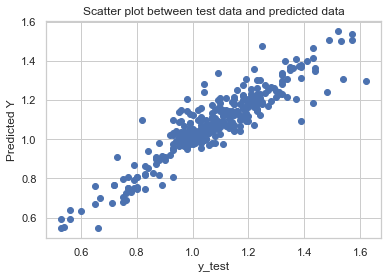

In [53]:
#plotting scatter plot between the test data and predicted data for knn
plt.scatter(y_test,predknn)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

Most of the average price is between 0.9 to 1.3 

## Saving the model and result

In [54]:
#saving the knn model
import joblib
joblib.dump(kneighbors,'Average_Price.pkl')

['Average_Price.pkl']

In [55]:
#saving the output to csv file
predicted_OP=pd.DataFrame(predknn)
predicted_OP.to_csv('Average_Price_Prediction.csv')

# 2. Finding the City or Region

For finding the city or region we need to create a classifier model. For this we consider Region as the dependent variable and rest other attributes as independent variables.

In [56]:
#lets take a seperate dataframe
ds_class=ds
ds_class.shape

(1436, 11)

In [57]:
ds_class

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0.000000,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0.000000,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0.000000,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0.000000,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0.693147,7
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0.693147,7
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0.693147,7
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0.693147,7


In [58]:
#seperating dependent variable from the dataframe
y=ds_class.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [59]:
#seperating independent variables from the dataframe
ds_class_x=ds_class.iloc[:,0:-1]
ds_class_x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0.0


In [60]:
#let us standardise the input variables
sc_class=StandardScaler()
x=sc_class.fit_transform(ds_class_x)
x=pd.DataFrame(x,columns=ds_class_x.columns)

In [61]:
print(x.shape,'\t',y.shape)

(1436, 10) 	 (1436,)


In [62]:
#splitting the input and target variable into test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)
print(x_train.shape,'\t',x_test.shape)

(1120, 10) 	 (316, 10)


In [63]:
print(y_train.shape,'\t',y_test.shape)

(1120,) 	 (316,)


In [64]:
#importing libraries for models and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [65]:
#creating a for loop for all the models
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LogisticRegression() is: 0.9482142857142857
Metrics:
Accuracy Score: 0.9145569620253164
Confusion Matrix: [[14  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  4]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      0.89      0.94         9
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        11
           7       0.83      1.00      0.91        10
           8       1.00      1.00      1.00         6
           9       0.73      1.00      0.85        11
          10       0.80      0.80      0.80         5
          11       1.00      1.00      1.00         4
  

In [66]:
#training using Multinomial NB
x_train,x_test,y_train,y_test=train_test_split(ds_class_x,y,test_size=.22,random_state=42)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)

print('Accuracy score:',accuracy_score(y_test,predmnb))
print('Confusion matrix:\n',confusion_matrix(y_test,predmnb))
print('Classification report:\n',classification_report(y_test,predmnb))


Accuracy score: 0.3575949367088608
Confusion matrix:
 [[14  0  0 ...  0  0  0]
 [ 0  5  0 ...  1  0  0]
 [ 3  0  3 ...  0  0  0]
 ...
 [ 0  2  0 ...  5  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  3]]
Classification report:
               precision    recall  f1-score   support

           0       0.29      0.93      0.44        15
           1       0.71      0.36      0.48        14
           2       0.14      0.25      0.18        12
           3       0.50      0.57      0.53         7
           4       0.50      0.11      0.18         9
           5       1.00      0.42      0.59        12
           6       0.62      0.45      0.53        11
           7       1.00      0.40      0.57        10
           8       0.00      0.00      0.00         6
           9       0.22      1.00      0.37        11
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       1.00      0.43      0.60        14
         

Of the above models,SVC and KNeighbors classifiers have the maximum accuracy score. These models can be considered as the best models and parameter tuning is to be done to improve the scores.

In [67]:
#finding the best parameters for KNeighbors Classifier using GridSearchcv
knnclass=KNeighborsClassifier()
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
parameters={'n_neighbors':[2,3,4,5,6],'weights':['uniform','distance']}
clf_class=GridSearchCV(estimator=knnclass,param_grid=parameters,cv=kfold,scoring='accuracy')
clf_class.fit(x,y)
clf_class.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [68]:
#training the KNeighbors Classifier model with best parameters
knnclass=KNeighborsClassifier(n_neighbors=2,weights='distance')
knnclass.fit(x_train,y_train)
print('score:',knnclass.score(x_train,y_train))
predknn_class=knnclass.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predknn_class))
print('Confusion Matrix:',confusion_matrix(y_test,predknn_class))
print('Classification Report:',classification_report(y_test,predknn_class))

score: 1.0


Accuracy Score: 0.9367088607594937
Confusion Matrix: [[13  0  0 ...  0  0  0]
 [ 0 12  0 ...  1  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  4]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        12
           3       0.88      1.00      0.93         7
           4       1.00      0.78      0.88         9
           5       1.00      1.00      1.00        12
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         6
           9       0.85      1.00      0.92        11
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        1

By parameter tuning the accuracy score for KNeighbors Classifier has been improved from 0.920 to 0.936

In [69]:
#finding best parameters for SVM using gridsearch
# defining parameter range
svc=SVC()
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','ploy']}  
  
grid = GridSearchCV(estimator=svc, param_grid=parameters,scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(x, y) 
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [70]:
#training the svm model with best parameters
svc=SVC(C=100,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train)
print('score:',svc.score(x_train,y_train))
predsvc_class=svc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predsvc_class))
print('Confusion Matrix:',confusion_matrix(y_test,predsvc_class))
print('Classification Report:',classification_report(y_test,predsvc_class))

score: 1.0


Accuracy Score: 0.9588607594936709
Confusion Matrix: [[14  0  0 ...  0  0  0]
 [ 0 12  0 ...  1  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  4]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9
           5       0.92      1.00      0.96        12
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         6
           9       0.85      1.00      0.92        11
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        1

By parameter tuning of SVC accuracy scores have been improved from 0.920 to 0.958

## Ensemble methods 

In [71]:
#using Random Forest Classifier
#best model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,random_state=42)
rfc.fit(x_train,y_train)
print('score:',rfc.score(x_train,y_train))
predrfc=rfc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predrfc))
print('Confusion Matrix:',confusion_matrix(y_test,predrfc))
print('Classification Report:',classification_report(y_test,predrfc))

score: 0.9991071428571429


Accuracy Score: 0.9683544303797469
Confusion Matrix: [[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  4]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         9
           5       0.92      1.00      0.96        12
           6       0.92      1.00      0.96        11
           7       0.90      0.90      0.90        10
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        11
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         4
          12       1.00      1.00    

In [72]:
#cross validating Random forest classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=10,scoring='accuracy')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [0.875      0.9375     0.92361111 0.97916667 0.95138889 1.
 0.93006993 0.97202797 0.90909091 0.94405594]
Mean Score: 0.9421911421911421
Standard Deviation: 0.03436828344556587


The mean score of cross validation is 0.94 which implies the model is performing well

In [73]:
from sklearn.ensemble import AdaBoostClassifier
svc_adb=SVC()
adbc=AdaBoostClassifier(base_estimator=svc_adb,algorithm='SAMME',n_estimators=20,learning_rate=0.1,random_state=42)
adbc.fit(x_train,y_train)
print('score:',adbc.score(x_train,y_train))
predadbc=adbc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predadbc))
print('Confusion Matrix:',confusion_matrix(y_test,predadbc))
print('Classification Report:',classification_report(y_test,predadbc))

score: 0.05178571428571429


Accuracy Score: 0.022151898734177215
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        12
           3       0.02      1.00      0.04         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        14
          13    

The ensemble method of Random Forest Classifier has higher accuracy score of 0.968 than the tuned svm classifier. Hence we can consider Random Forest Classifier as the best model for training this data

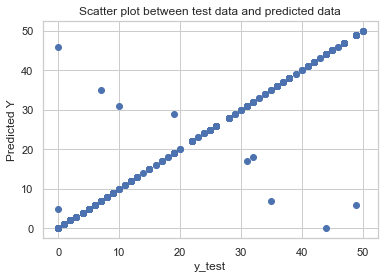

In [74]:
#plotting scatter plot between the test data and predicted data for knn
plt.scatter(y_test,predrfc)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

The actual vs predicted output shows a linear relationship and is not overfitted or underfitted.

## Saving the model and result

In [75]:
#saving the RFC model
import joblib
joblib.dump(rfc,'City_or_Region.pkl')

['City_or_Region.pkl']

In [76]:
#saving the output to csv file
pred_OP=pd.DataFrame(predrfc)
pred_OP.to_csv('predicted_city_or_region.csv')